In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools as itr
import doctest

In [2]:
N = 10
M = 100
relax = 10*N*N
J = 1
s = np.ones((N,N), dtype=int)

In [3]:
def energy(s, J):
    '''
    Returns the total energy of s.
    >>> energy(np.ones((10,10)), J=1)
    -400.0
    >>> energy(np.ones((10,10)), J=-1)
    400.0
    '''
    E = 0
    for i,j in itr.product(range(N),range(N)):
        E += s[i,j]*(s[(i+1)%N,j] + s[(i-1),j] + s[i,(j+1)%N] + s[i,(j-1)])
    return -J * E

In [4]:
def flip(s, i, j, beta, J):
    '''
    Flips spin i,j of matrix s given beta and J.
    >>> flip(np.ones((10,10)), 1,1, 0, 1)
    True
    >>> flip(np.ones((10,10)), 1,1, np.inf, 1)
    False
    >>> flip(np.ones((10,10)), 1,1, np.inf, -1)
    True
    >>> flip(np.ones((10,10)), 1,1, 0, -1)
    True
    '''
    E_old = -J * s[i,j]*(s[(i+1)%N,j] + s[(i-1),j] + s[i,(j+1)%N] + s[i,(j-1)])
    s[i,j] *= -1
    E_new = -J * s[i,j]*(s[(i+1)%N,j] + s[(i-1),j] + s[i,(j+1)%N] + s[i,(j-1)])
    delta_E = E_new - E_old
    if delta_E > 0:
        if np.random.random() > np.exp(-beta*delta_E):
            s[i,j] *= -1 # rejecting the move
            return False
    return True

In [5]:
def run(n, s, beta, J):
    '''
    Run the algorithm for n times.
    '''
    for k in range(n):
        i = np.random.randint(N)
        j = np.random.randint(N)    
        flip(s, i, j, beta, J)

In [6]:
run(relax, s, 0, J)
beta = 1.5**np.arange(-12,3)

En = np.zeros_like(beta)
En_error = np.zeros_like(beta)
Mag = np.zeros_like(beta)
C = np.zeros_like(beta)

for i in range(len(beta)):
    run(relax, s, beta[i], J)
    E = np.zeros(M)
    mag = np.zeros(M)

    for m in range(M):
        run(relax, s, beta[i], J)
        E[m] = energy(s,J)/(N*N)
        mag[m] = s.mean()
    En[i] = E.mean()
    Mag[i] = mag.mean()
    C[i] = beta[i]**2*E.std()
    En_error[i] = E.std()/np.sqrt(M)

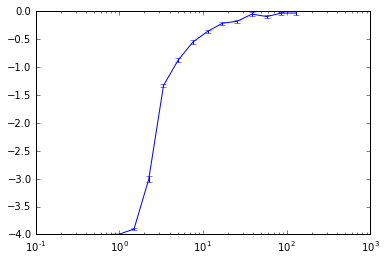

In [7]:
ax = plt.subplot(1,1,1)
ax.errorbar(1/beta, En, yerr=En_error)
ax.set_xscale('log')

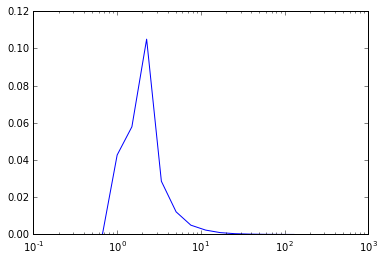

In [8]:
plt.semilogx(1/beta,C)

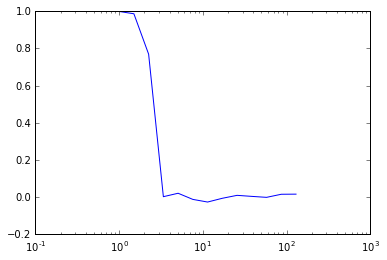

In [9]:
plt.semilogx(1/beta,Mag)

In [10]:
doctest.testmod()

TestResults(failed=0, attempted=6)

In [22]:
def f(a):
    return a.std()

a = np.random.random(1000)
c = np.zeros_like(a)

for i in range(1,len(a)+1):
    idx = list(range(i-1))+list(range(i, len(a)))
    c[i-1] = f(a[idx])
c0 = f(a)

np.sqrt(((c-c0)**2).sum())

0.0040714572861370313

In [19]:
c

array([ 0.22904868,  0.2349487 ,  0.24264337,  0.21120199,  0.25296308,
        0.25206737,  0.25375266,  0.21794883,  0.24172587,  0.25400589])